In [1]:
from elections.Ballot import Ballot
from elections.DefaultConfigOptions import *
from elections.ElectionConstructor import ElectionConstructor, construct_irv, construct_h2h, construct_plurality
from elections.NDPopulation import NDPopulation
from network.ElectionModel import ElectionModel


In [2]:
def create_model_and_population(ideology_bins: int, ideology_dim: int) -> (ElectionModel, NDPopulation):
    ideology_dim = 1
    ideology_bins = 32
    hidden_ratio = 4

    model = ElectionModel(21, 256, 4)

    population_means = np.zeros(shape=(ideology_dim,))
    population_stddev = np.ones(shape=(ideology_dim,))
    pop = NDPopulation(population_means, population_stddev)
    return model, pop

In [3]:
def gen_random_candidates(population: NDPopulation, n: int)-> List[Candidate]:
    candidates = []
    for i in range(n):
        # ivec = population.unit_sample_voter().ideology.vec * .5
        ivec = population.unit_sample_voter().ideology.vec
        candidates.append(Candidate(f"c-{i}", Independents, Ideology(ivec), 0))

    return candidates

def run_sample_election(candidates: List[Candidate], process: ElectionConstructor, population: NDPopulation, n_voters: int):
    voters = population.generate_unit_voters(n_voters)
    ballots = [Ballot(v, candidates, unit_election_config) for v in voters]
    result = process.run(ballots, set(candidates))
    winner = result.winner()
    return winner, candidates

In [4]:
import matplotlib.pyplot as plt
def plot_results(results: List[List[float]], title: str, labels: List[str]):
    n_rows = 1
    n_cols = 1
    fig, axis = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (20, 10))
    fig.suptitle(title, color = "black", fontsize = 22)
    fig.set_facecolor("white")

    count = 0
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    axis.tick_params(axis = 'x', colors = "black")
    axis.tick_params(axis = 'y', colors = "black")
    axis.set_xlim([-1, 1])

    bins = np.arange(-1, 1, 2 / 21)
    axis.hist(results, bins = bins, label = labels, edgecolor = 'white', stacked = True)
    axis.legend()
    axis.set_xlabel("Sigma From Origin", fontsize = 20)
    axis.set_ylabel("Frequency of Winner at Ideology", fontsize = 20)

    plt.savefig("foo.png")

In [5]:
def run_comparison(n_voters, process):
    model, population = create_model_and_population(21, 1)

    winners = []
    for i in range(1000):
        candidates = gen_random_candidates(population, 5)
        w, c = run_sample_election(candidates, process, population, n_voters)
        winners.append(w.ideology.vec[0])

    return winners

In [6]:
def make_plot(process: ElectionConstructor, title: str, label: str, path: str):
    winners = run_comparison(500, process)
    plot_results([winners], title, [label])
    plt.savefig (path)

2021-07-30 00:03:05.396790: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


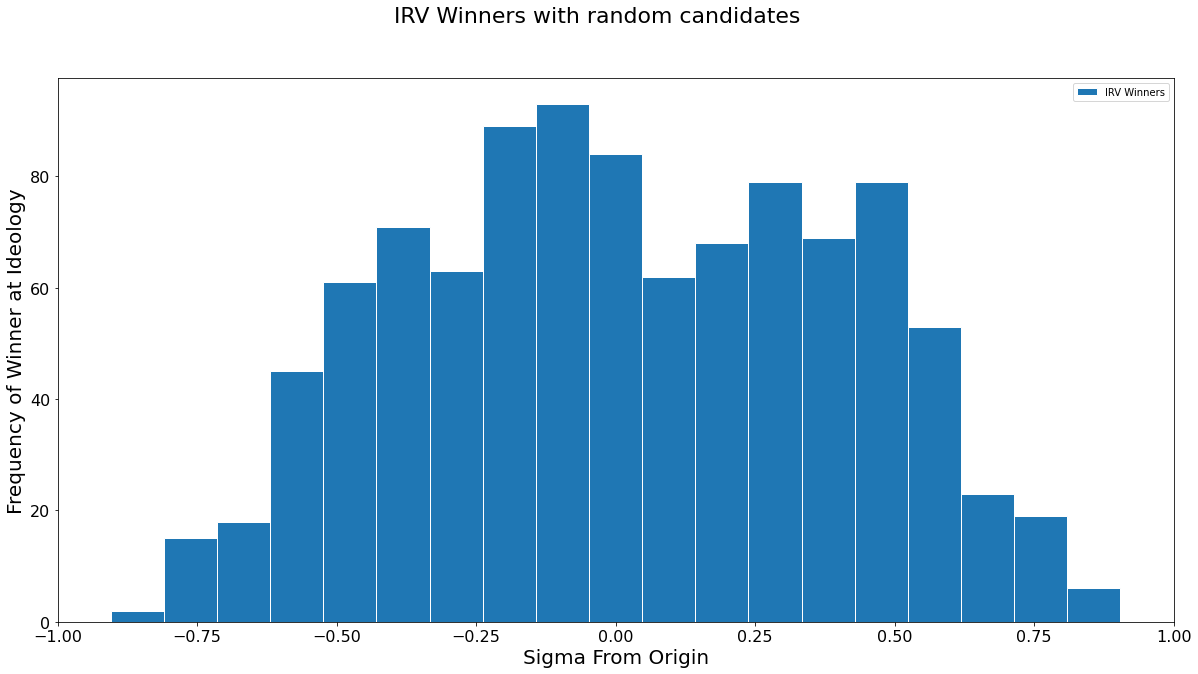

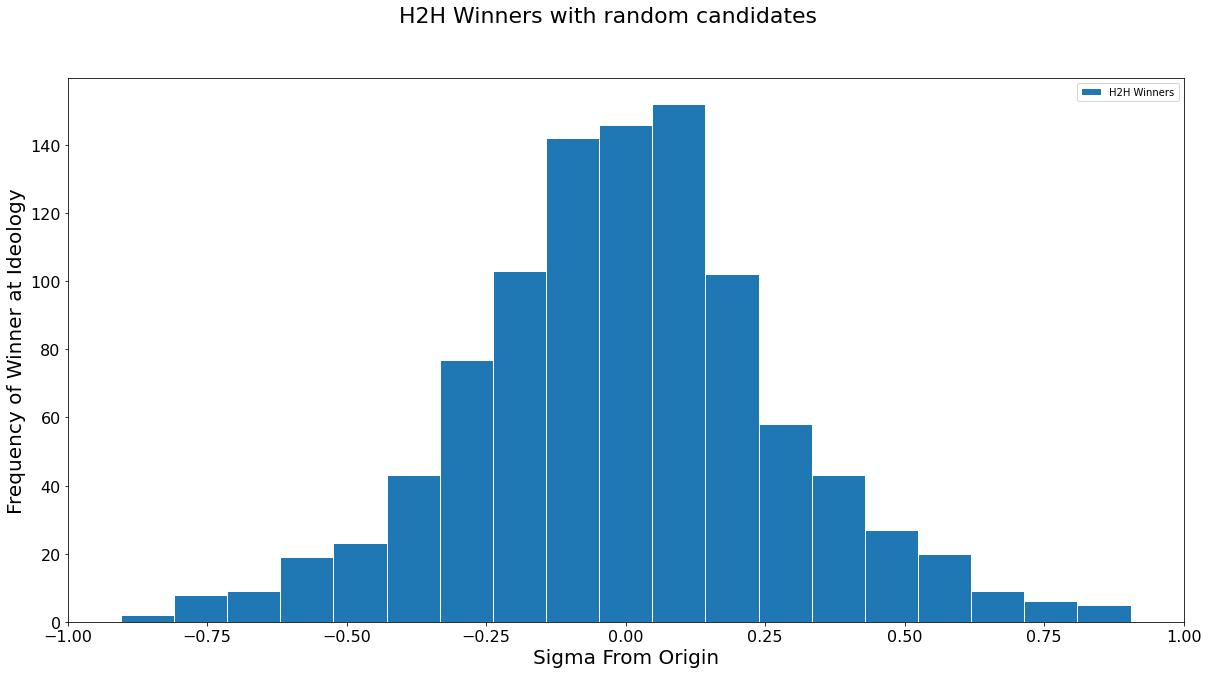

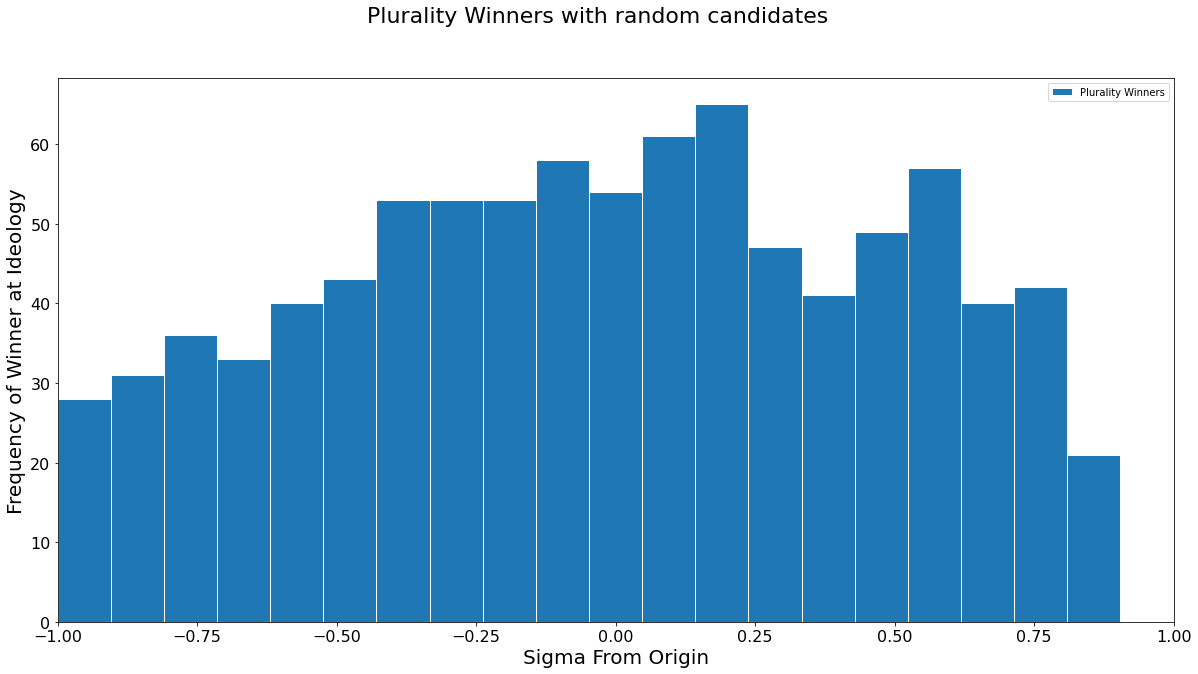

In [7]:
irv_process = ElectionConstructor(construct_irv, "IRV")
h2h_process = ElectionConstructor(construct_h2h, "H2H")
pty_process = ElectionConstructor(construct_plurality, "H2H")
make_plot(irv_process, "IRV Winners with random candidates", "IRV Winners", "random_irv_r1.png")
make_plot(h2h_process, "H2H Winners with random candidates", "H2H Winners", "random_h2h_r1.png")
make_plot(pty_process, "Plurality Winners with random candidates", "Plurality Winners", "random_pty_r1.png")

